In [1]:
%matplotlib inline
import control
import matplotlib
import pylab as plt
import numpy as np

In [2]:
den = np.convolve([1,1],[1,2])
den = np.convolve(den,[1,5])
G = control.tf([1],den)
print(G)


           1
-----------------------
s^3 + 8 s^2 + 17 s + 10



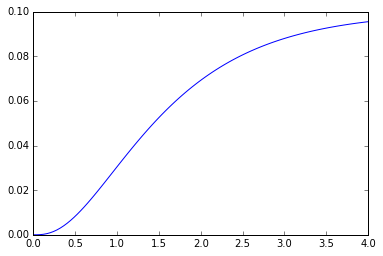

In [3]:
T = np.linspace(0,4,100)
T, y_step = control.step_response(G,T)
plt.plot(T,y_step)

-0.017045264977609595
0.047519245474076155
0.9292929292929294


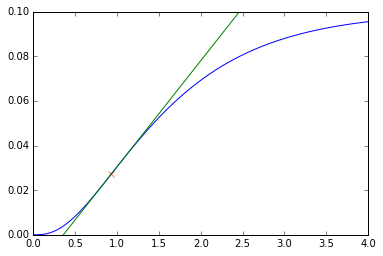

In [4]:
def plot_line(m,b,X):
    y = [m*x + b for x in X ]
    plt.plot(X,y)
    return y,X
dy_step = np.gradient(y_step,T)
dy2_step = np.gradient(np.gradient(y_step,T),T)
min_arg_y_step = np.argmin(np.absolute(dy2_step))
plt.plot(T,y_step)
plt.plot(T[min_arg_y_step],y_step[min_arg_y_step],'xr')
yi = y_step[min_arg_y_step]
xi = T[min_arg_y_step]
m = dy_step[min_arg_y_step]
b = -m*xi+yi
print(b)
print(m)
print(T[min_arg_y_step])
# plt.plot(T,dy_step,'r')
# plt.plot(T,dy2_step,'g')
y_line, T_line = plot_line(m,b,T)
plt.ylim([0,0.1])


T_foo, y_step = control.step_response(G,np.linspace(0,8,100))

In [5]:
T_1 = len(y_line)-1
for i in range(len(y_line)-1,-1,-1):
    if y_line[i]<y_step[-1]:
        break
    T_1 -= 1

T_0 = 0
for i in range(len(y_line)):
    if y_line[i]>y_step[0]:
        break
    T_0 += 1
print T_line[T_0]
print T_line[T_1]

L = T_line[T_0]
T = T_line[T_1]-T_line[T_0]
Kp = 1.2 * T/L
Ti = 2 * L
Td = 0.5*L

0.36363636363636365
2.4242424242424243



0.8992 s^2 + 4.945 s + 6.8
--------------------------
         0.7273 s

[-2.75000004 -2.74999996]

            0.8992 s^2 + 4.945 s + 6.8
--------------------------------------------------
0.7273 s^4 + 5.818 s^3 + 13.26 s^2 + 12.22 s + 6.8



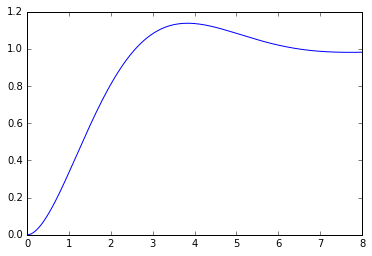

In [8]:
GKp = control.tf([Kp],[1]) 
GKi = control.tf([Kp],[Ti,0])
GKd = control.tf([Kp*Td, 0],[1])
Gc = control.parallel(GKp,control.parallel(GKi,GKd))
print(Gc)
print(Gc.zero())
GHcl = control.feedback(control.series(Gc,G))
print(GHcl)
T = np.linspace(0,8,1000)
T, y_cl_step = control.step_response(GHcl,T)
plt.plot(T,y_cl_step)


         1
------------------
s^3 + 7 s^2 + 10 s


           70
-----------------------
s^3 + 7 s^2 + 10 s + 70



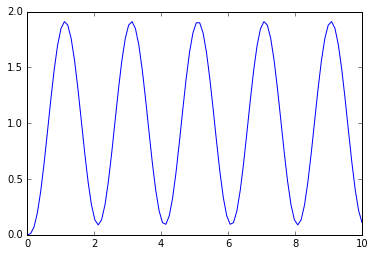

In [9]:
den = np.convolve([1,0],[1,2])
den = np.convolve(den,[1,5])
G = control.tf([1],den)
print(G)

Kcr = 70
Gcr = control.tf([Kcr],[1])
GHcl = control.feedback(control.series(Gcr,G),1)
print(GHcl)

T = np.linspace(0,10,100)
T,y_step = control.step_response(GHcl,T)
plt.plot(T,y_step)


10.36 s^2 + 41.73 s + 42
------------------------
        0.9935 s

[-2.01316848 -2.01316848]
[0.]


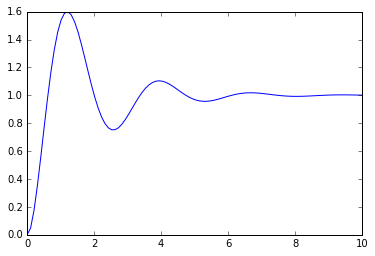

In [10]:
omegacr = np.sqrt(10)
Pcr = 2*np.pi / omegacr

Kp = 0.6*Kcr
Ti = 0.5*Pcr
Td = 0.125*Pcr

GKp = control.tf([Kp],[1]) 
GKi = control.tf([Kp],[Ti,0])
GKd = control.tf([Kp*Td, 0],[1])
Gc = control.parallel(GKp,control.parallel(GKi,GKd))
print(Gc)
print(Gc.zero())
print(Gc.pole())

GHcl = control.feedback(control.series(Gc,G),1)
T,y_cl_step = control.step_response(GHcl,T)
plt.plot(T,y_cl_step)


21 s^2 + 4.2 s + 0.21
---------------------
          s

[-0.1+1.19267483e-09j -0.1-1.19267483e-09j]
[0.]


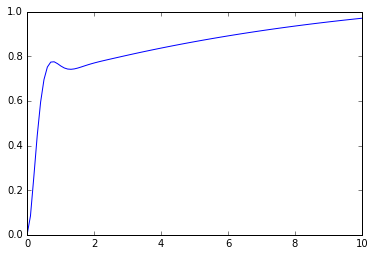

In [13]:
Gc_zeros_tunned = control.tf([1,0.1],[1])
Gc_Kp_integrator = control.tf([0.5*Kp],[1,0])
Gc = control.series(control.series(Gc_zeros_tunned,Gc_zeros_tunned),Gc_Kp_integrator)
print(Gc)
print(Gc.zero())
print(Gc.pole())

GHcl = control.feedback(control.series(Gc,G),1)
T,y_cl_step = control.step_response(GHcl,T)
plt.plot(T,y_cl_step)

In [ ]:
print Kp